# ME460 Linkages - Prof. Mark Ganter
# 4 position path generator via dyad-standard and characteristic equations

LEFT DYAD EQ.s
posl2= d1*(-1 + exp(2.05076187109334*I))*exp(I*t1) + d2*(exp(I*g2) - 1)*exp(I*t2) + 1 - 1.74*exp(-0.509636141582344*I)
posl3= d1*(-1 + exp(2.96705972839036*I))*exp(I*t1) + d2*(exp(I*g3) - 1)*exp(I*t2) - 0.74
posl4= d1*(-1 + exp(3.97935069454707*I))*exp(I*t1) + d2*(exp(I*g4) - 1)*exp(I*t2) + 1 - 1.74*exp(0.452040276266531*I)

left char solution g3 & g4 173.09394996647097 149.7792683336247
abs(left_char)= 2.69134069275745e-15

left dyad solution: r1,t1,r2,t2 = 0.699609517200077 180.75203048540257 0.329705502950131 -365.5719022307897
abs(pos3a)= 2.35e-16
abs(pos4a)= 3.38e-16

right char solution s3 & s4 -63866.78434234944 -91168.81324066545
abs(right_char)= 1.52668739358150e-13

RIGHT DYAD EQ.s
posr2= d3*(-1 + exp(3.14933335107752*I))*exp(I*t3) + d4*(-1 + exp(4.21875108233215*I))*exp(I*t4) + 1 - 1.74*exp(-0.509636141582344*I)
posr3= d3*(-1 + exp(-1114.68566943516*I))*exp(I*t3) + d4*(-1 + exp(-9.54531127216193*I))*exp(I*t4) - 0.74
posr4= d3*(-1 + exp(-1591.19596618541*I))*ex

<IPython.core.display.Javascript object>


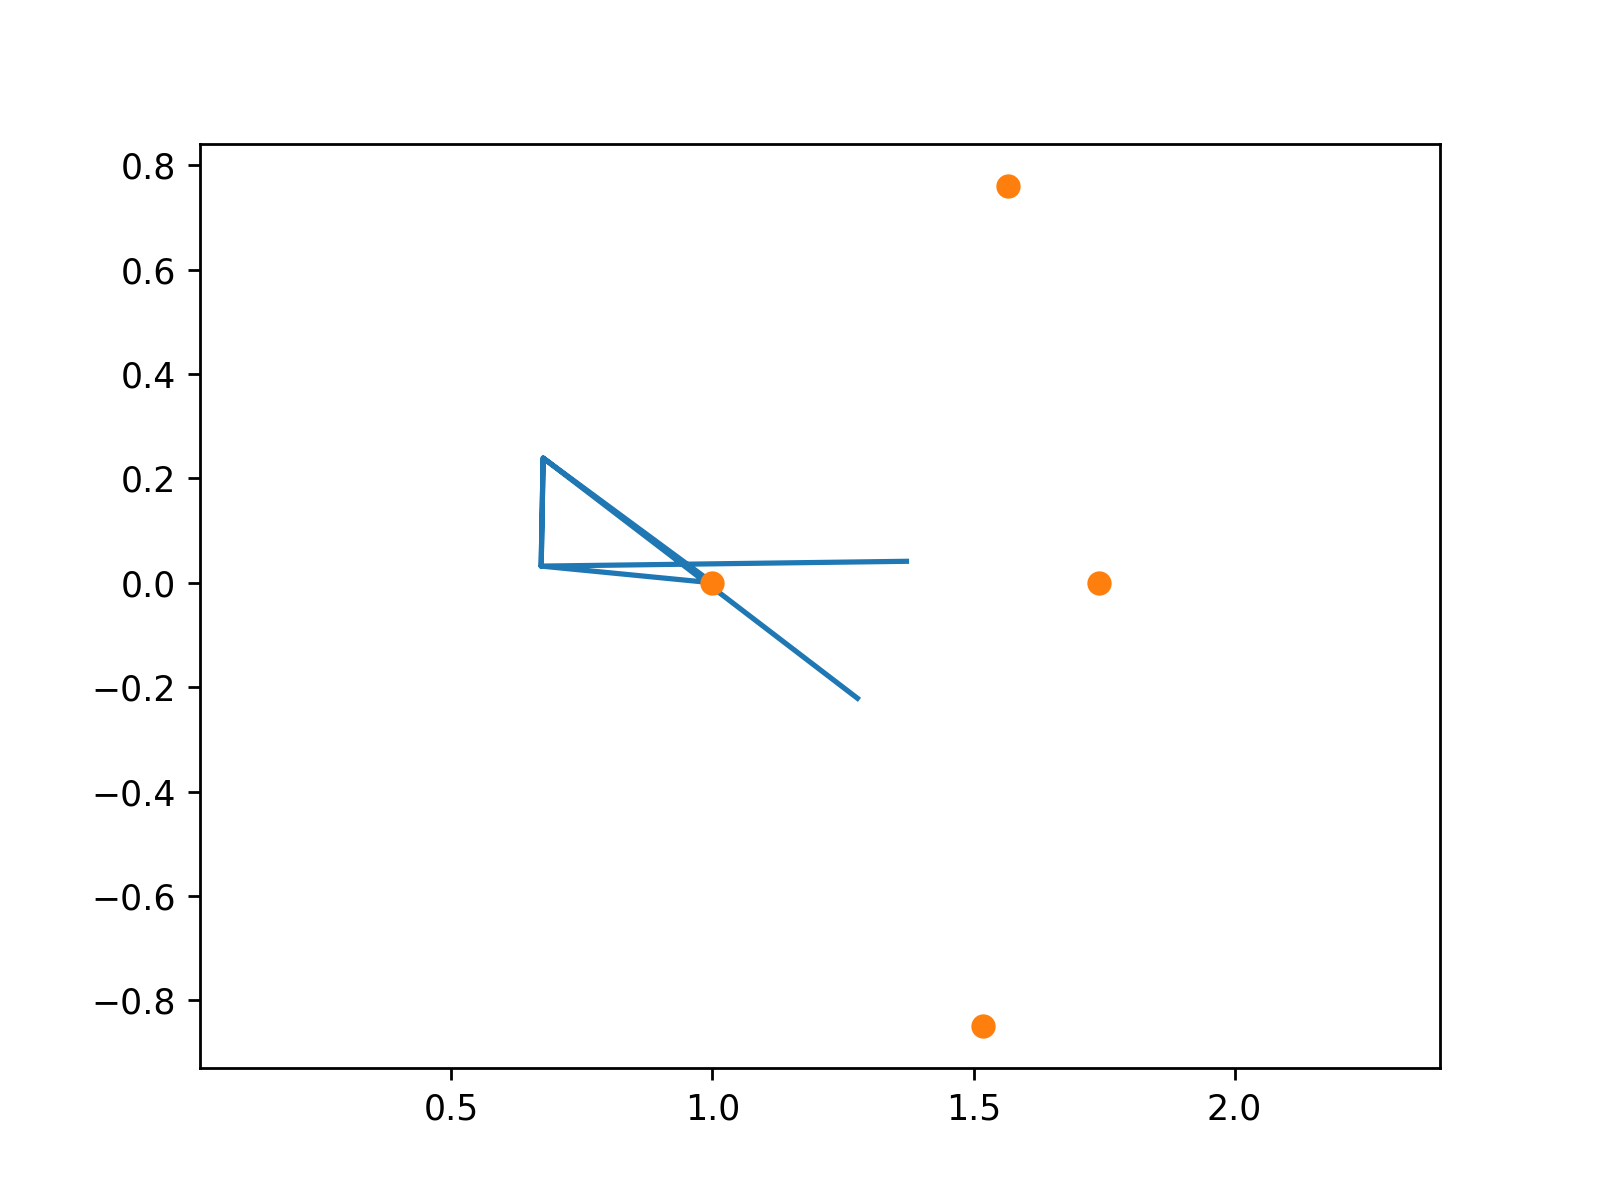

In [1]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
# import math as m
from sympy import *
import numpy as np
import random

import matplotlib.pyplot as plt

#define random angle function
def randang():
   return(2*np.pi*random.random())

TOLERANCE = 1.0-3

# 4 precision coupler points
c1 = 1*exp(I*0)
c2 = 1.74*exp(I*radians(-29.2))
c3 = 1.74*exp(I*0)
c4 = 1.74*exp(I*radians(25.9))

# set up all the symbols
d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

# define the R vectors
r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

# define the deltas.
del2 = c2-c1
del3 = c3-c1
del4 = c4-c1

# define the Phi's
p2 = radians(117.5)
p3 = radians(170)
p4 = radians(228)

# LEFT SIDE #
#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r2*(exp(I*g4)-1) - del4

print("LEFT DYAD EQ.s")
print("posl2=",posl2)
print("posl3=",posl3)
print("posl4=",posl4)
print()

# characteristic polynomial approach
#generate a random angle for gamma2
angle = randang()

# left side characteristic equation to solve for gamma3 & gamma4
leftside = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft = leftside.det()
detlefta = detleft.subs(g2,angle)
#print("detlefta=",detlefta)

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detlefta),im(detlefta)), (g3, g4), (randang(),randang()), 
            maxsteps=200, tol=TOLERANCE, verify=false)  #, verbose=true )

#print out angles.  note: % is the mod function.
print("left char solution g3 & g4",degrees(ans[0])%360,degrees(ans[1])%360)
print ("abs(left_char)=",abs(detlefta.evalf(subs={g3:ans[0],g4:ans[1]}) ))
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
pos2a = posl2.subs(g2,angle)
pos3a = posl3.subs(g3,ans[0])
pos4a = posl4.subs(g4,ans[1])

# set g's before information is overwritten
g2a = angle
g3a = ans[0]
g4a = ans[1]

# now solve the dyad-standard equations for the left side.  Use pos #3 & pos #4.
ansl = nsolve((re(pos3a),im(pos3a),re(pos4a),im(pos4a)), (d1, t1, d2, t2), 
            (2*random.random(),randang(),4*random.random() ,randang()), 
            maxsteps=100, tol=TOLERANCE, verify=false)

print("left dyad solution: r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(pos3a)=",N(abs(pos3a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(pos4a)=",N(abs(pos4a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()

# solve the right side using information from left solutions (g3 & g4 from char. eq.)

# again, generate a random angle for psi2.
angle = randang()
# right characteristic equation to solve for psi3 & psi4
rightside = Matrix([[(exp(I*s2)-1),(exp(I*g2a)-1),del2],[(exp(I*s3)-1),(exp(I*g3a)-1),del3],[(exp(I*s4)-1),(exp(I*g4a)-1),del4]])
#pprint(N(rightside))
detright = rightside.det()
# s2 is a choice (or given in design specs)
detrighta = detright.subs(s2,angle)

#next solve right characteristic equation for psi3 and psi4
ansr = nsolve((re(detrighta),im(detrighta)), (s3, s4), (radians(30),radians(40)), 
            maxsteps=200, tol=TOLERANCE, verify=false )  

s2b = angle
s3b = ansr[0]
s4b = ansr[1]

print("right char solution s3 & s4",degrees(ansr[0]),degrees(ansr[1]))
print ("abs(right_char)=",abs(detrighta.evalf(subs={s3:s3b,s4:s4b}) ))
print()

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2b)-1) + r4*(exp(I*g2a)-1) - del2
posr3 = r3*(exp(I*s3b)-1) + r4*(exp(I*g3a)-1) - del3
posr4 = r3*(exp(I*s4b)-1) + r4*(exp(I*g4a)-1) - del4

print("RIGHT DYAD EQ.s")
print("posr2=",posr2)
print("posr3=",posr3)
print("posr4=",posr4)
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
ansr = nsolve((re(posr3),im(posr3),re(posr4),im(posr4)), (d3, t3, d4, t4), (2.0,radians(120), 2.0 ,radians(50)), 
            maxsteps=200, tol=TOLERANCE, verify=false)

print("right augmented dyad solution r3,t3,r4,t4 =",ansr[0],degrees(ansr[1]),ansr[2],degrees(ansr[3]))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}) ),3))
print ("abs(posr4)=",N(abs(posr4.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}) ),3))
print()

print()
evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ansr[0],t3:ansr[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ansr[2],t4:ansr[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

print("phi2 =",degrees(p2)%360,"phi3 =",degrees(p3)%360,"phi4 =",degrees(p4)%360)
print("psi2 =",degrees(s2b)%360,"psi3 =",degrees(s3b)%360,"psi4 =",degrees(s4b)%360)
print("gamma2 =",degrees(g2a)%360,"gamma3 =",degrees(g3a)%360,"gamma4 =",degrees(g4a)%360)
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print("del4 =",N(del4.evalf(),3))
print()

print("*R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("*R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("*R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("*R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

# attempt to rate the linkage
print("* Linkage Rating *")
s = min(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
l = max(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
pnq = abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)
print('P+Q > S+L =',pnq ,'>',(s+l) )
if (abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)) > (s+l):
    print("grashof = true")
else:
    print("grashof = false")
    
print("Link length ratio l/s = ",l/s)
print()

evalOa = c1-evalr2-evalr1 
evalA = c1-evalr2
evalB = c1-evalr4
evalOb = c1-evalr4-evalr3

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",c1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot 
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(c1),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(c1),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(c1),re(c2),re(c3),re(c4)],[im(c1),im(c2),im(c3),im(c4)],'o',)
ax.set_aspect('equal',adjustable='datalim')
plt.show()


In [ ]:
evalr1 = 1.20
evalr3 = 0.447
evalr5 = 1.33
evalr6 = 0.598

cos_mu = abs((abs(evalr3)**2+abs(evalr5)**2-abs(evalr6)**2-abs(evalr1)**2)/(2*abs(evalr5)*abs(evalr3)))
cos_mu_denom = abs((abs(evalr6)*abs(evalr1))/(abs(evalr5)*abs(evalr3)))
cos_mu_max = cos_mu - cos_mu_denom
cos_mu_min = cos_mu + cos_mu_denom
print("cos_mu_min,cos_mu_max = ",re(cos_mu_min),re(cos_mu_max))
#print("cos_mu_min = ",degrees(acos(re(cos_mu_min))))
print("cos_mu_max = ",degrees(acos(re(cos_mu_max))))
print()